# Analysis and Informal Plotting of Mouse Tracking Data

Before doing any of the Python snippets below, must first use `process.py` to parse raw data and generate a number of data files: 
- `processed.csv`, which contains the summary statistics
- `nx.csv`, `ny.csv`, `rx.csv`, and `rx.csv`, which contain the actual processed mouse trajectories.

Note: before process.py can operate correctly, there are a few trials that must be manually removed from CSV files.  They are listed in data/notes.md





In [1]:
import os 
import glob

import numpy as np # Numeric calculation
import pandas as pd # General purpose data analysis library
import squeak # For mouse data

# For plotting
import matplotlib.pyplot as plt 
%matplotlib inline
# Prettier default settings for plots (optional)
import seaborn
seaborn.set_style('white')
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data = pd.read_csv('processed.csv') # import data from preprocessed CSV files
nx = pd.read_csv('nx.csv')
ny = pd.read_csv('ny.csv')
rx = pd.read_csv('rx.csv')
ry = pd.read_csv('ry.csv')

In [3]:
dataCorrect=data.loc[data['accuracy']==1] # include only correct trials


In [4]:
dataCorrect.rt=dataCorrect['rt'].astype(float) # convert some RTs to floats (not sure why this is occurring)  ignore the error that it throws
float(len(dataCorrect))/float(len(data)) # accuracy

/usr/local/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0.906029263370333

After subsetting on the correct trials, we can use the '.groupby()' function in Python to generate tables of means and SDs

In [5]:
# tables of means (USE THIS!!!)
print dataCorrect.groupby(['truth','size','operation','SOAcondition'])['rt','init_time'].mean()

                                             rt   init_time
truth size  operation SOAcondition                         
False large add       negative      1437.047382  420.798005
                      neutral       1473.184729  421.428571
            mult      negative      1377.836879  398.581560
                      neutral       1444.619385  419.810875
      small add       negative      1399.147465  393.225806
                      neutral       1450.209459  417.477477
            mult      negative      1314.078390  391.991525
                      neutral       1346.814103  408.803419
True  large add       negative      1371.993023  403.906977
                      neutral       1432.514085  421.220657
            mult      negative      1295.019231  402.179487
                      neutral       1312.769556  406.596195
      small add       negative      1192.876033  377.231405
                      neutral       1226.545267  400.164609
            mult      negative      1246

In [8]:
# tables of Standard Deviations (DON'T USE THIS!!!)
print dataCorrect.groupby(['truth','size','operation','SOAcondition'])['rt','init_time'].std()

                                            rt   init_time
truth size  operation SOAcondition                        
False large add       negative      379.252264  245.270875
                      neutral       421.874724  260.640180
            mult      negative      359.929460  218.273859
                      neutral       365.155425  228.457135
      small add       negative      367.478832  219.540991
                      neutral       406.020558  243.533022
            mult      negative      303.169586  217.831134
                      neutral       349.750474  221.945507
True  large add       negative      418.534710  257.526248
                      neutral       433.234028  269.026601
            mult      negative      371.872528  213.694432
                      neutral       342.807462  210.207957
      small add       negative      338.333573  201.099755
                      neutral       335.630282  205.196834
            mult      negative      346.488294  213.5517

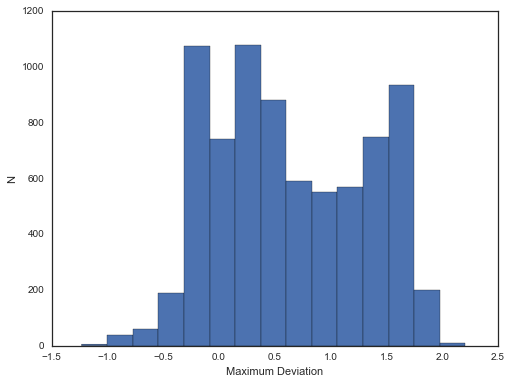

In [9]:
plt.hist(data.md, bins=15)
plt.xlabel("Maximum Deviation")
plt.ylabel("N")
plt.show()

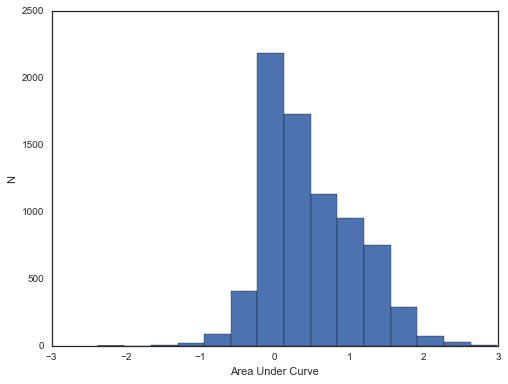

In [10]:
plt.hist(data.auc, bins=15)
plt.xlabel("Area Under Curve")
plt.ylabel("N")
plt.show()

In [6]:
print dataCorrect.groupby(['truth','size','operation','SOAcondition'])['md','auc','xflips'].mean()

                                          md       auc    xflips
truth size  operation SOAcondition                              
False large add       negative      0.771924  0.580880  0.847880
                      neutral       0.771372  0.584386  0.903941
            mult      negative      0.741327  0.589071  0.936170
                      neutral       0.794678  0.589855  0.952719
      small add       negative      0.842114  0.648422  0.875576
                      neutral       0.806765  0.616908  0.948198
            mult      negative      0.692851  0.576195  0.747881
                      neutral       0.744943  0.596480  0.756410
True  large add       negative      0.581401  0.381062  0.806977
                      neutral       0.611615  0.395693  0.835681
            mult      negative      0.552787  0.372115  0.728632
                      neutral       0.526341  0.365338  0.665962
      small add       negative      0.447855  0.314286  0.551653
                      neu

In [13]:
print dataCorrect.groupby(['truth','size','operation','SOAcondition'])['md','auc','xflips'].std()

                                          md       auc    xflips
truth size  operation SOAcondition                              
False large add       negative      0.665497  0.616526  1.323957
                      neutral       0.679697  0.638564  1.680164
            mult      negative      0.667504  0.633775  1.597349
                      neutral       0.674668  0.621605  1.663517
      small add       negative      0.653940  0.619250  1.380698
                      neutral       0.685138  0.620170  1.633703
            mult      negative      0.637679  0.627081  1.301243
                      neutral       0.650082  0.590705  1.145385
True  large add       negative      0.680544  0.605686  1.609741
                      neutral       0.676232  0.559256  1.436274
            mult      negative      0.661898  0.585032  1.302181
                      neutral       0.640173  0.587365  1.286105
      small add       negative      0.670176  0.585762  1.142148
                      neu

In [7]:
# get TRUE Addition trials
dataTrueAdd=dataCorrect.loc[(dataCorrect['truth']==1) & (dataCorrect['operation']=='add')]


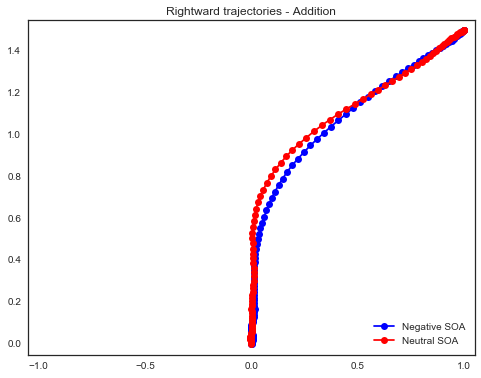

In [8]:
# Plot average *rightward* trajectories by SOAcondition
#dataRight=dataCorrect.loc[dataCorrect['response']==2] # plot ALL trials
dataRight=dataTrueAdd.loc[dataTrueAdd['response']==2] # plot only TRUE trials


negativeRight_indices = dataRight[dataRight.SOAcondition=='negative'].index
neutralRight_indices = dataRight[dataRight.SOAcondition=='neutral'].index

negRightX = nx.iloc[negativeRight_indices].mean()
negRightY = ny.iloc[negativeRight_indices].mean()

neutralRightX = nx.iloc[neutralRight_indices].mean()
neutralRightY = ny.iloc[neutralRight_indices].mean()



plt.plot(negRightX, negRightY, '-o', color='blue', label='Negative SOA')
plt.plot(neutralRightX, neutralRightY, '-o', color='red', label='Neutral SOA')
plt.legend(loc="lower right")
plt.title("Rightward trajectories - Addition")
plt.xlim((-1.05, 1.05))
plt.ylim((-.05, 1.55))
plt.show()

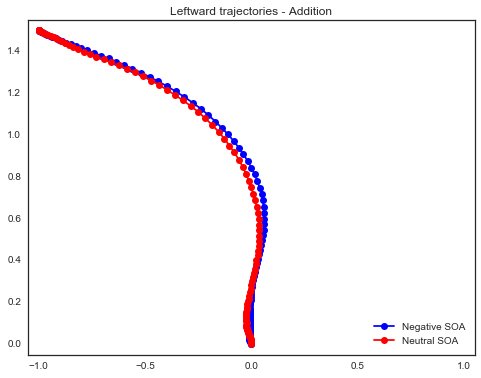

In [9]:
# Plot average *leftward* trajectories by SOAcondition
#dataLeft=dataCorrect.loc[dataTrue['response']==1] # plot ALL trials
dataLeft=dataTrueAdd.loc[dataTrueAdd['response']==1] # plot only TRUE trials



negativeLeft_indices = dataLeft[dataLeft.SOAcondition=='negative'].index
neutralLeft_indices = dataLeft[dataLeft.SOAcondition=='neutral'].index

negLeftX = -nx.iloc[negativeLeft_indices].mean()  # use negative since process.py remaps before computing AUC and MD
negLeftY = ny.iloc[negativeLeft_indices].mean()

neutralLeftX = -nx.iloc[neutralLeft_indices].mean()
neutralLeftY = ny.iloc[neutralLeft_indices].mean()



plt.plot(negLeftX, negLeftY, '-o', color='blue', label='Negative SOA')
plt.plot(neutralLeftX, neutralLeftY, '-o', color='red', label='Neutral SOA')
plt.legend(loc="lower right")
plt.title("Leftward trajectories - Addition")
plt.xlim((-1.05, 1.05))
plt.ylim((-.05, 1.55))
plt.show()

In [10]:
# get TRUE Multiplication trials
dataTrueMult=dataCorrect.loc[(dataCorrect['truth']==1) & (dataCorrect['operation']=='mult')]



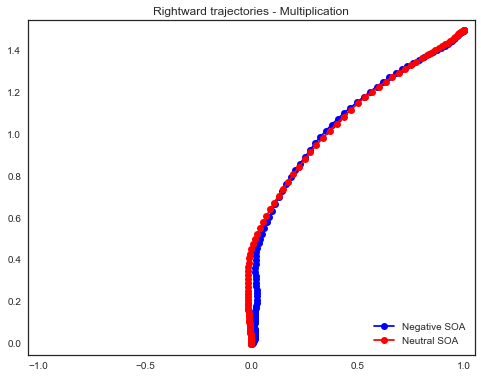

In [11]:
# Plot average *rightward* trajectories by SOAcondition
#dataRight=dataCorrect.loc[dataCorrect['response']==2] # plot ALL trials
dataRight=dataTrueMult.loc[dataTrueMult['response']==2] # plot only TRUE trials


negativeRight_indices = dataRight[dataRight.SOAcondition=='negative'].index
neutralRight_indices = dataRight[dataRight.SOAcondition=='neutral'].index

negRightX = nx.iloc[negativeRight_indices].mean()
negRightY = ny.iloc[negativeRight_indices].mean()

neutralRightX = nx.iloc[neutralRight_indices].mean()
neutralRightY = ny.iloc[neutralRight_indices].mean()



plt.plot(negRightX, negRightY, '-o', color='blue', label='Negative SOA')
plt.plot(neutralRightX, neutralRightY, '-o', color='red', label='Neutral SOA')
plt.legend(loc="lower right")
plt.title("Rightward trajectories - Multiplication")
plt.xlim((-1.05, 1.05))
plt.ylim((-.05, 1.55))
plt.show()

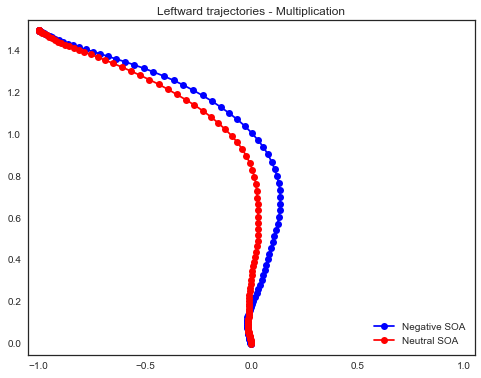

In [12]:
# Plot average *leftward* trajectories by SOAcondition
#dataLeft=dataCorrect.loc[dataTrue['response']==1] # plot ALL trials
dataLeft=dataTrueMult.loc[dataTrueMult['response']==1] # plot only TRUE trials



negativeLeft_indices = dataLeft[dataLeft.SOAcondition=='negative'].index
neutralLeft_indices = dataLeft[dataLeft.SOAcondition=='neutral'].index

negLeftX = -nx.iloc[negativeLeft_indices].mean()  # use negative since process.py remaps before computing AUC and MD
negLeftY = ny.iloc[negativeLeft_indices].mean()

neutralLeftX = -nx.iloc[neutralLeft_indices].mean()
neutralLeftY = ny.iloc[neutralLeft_indices].mean()



plt.plot(negLeftX, negLeftY, '-o', color='blue', label='Negative SOA')
plt.plot(neutralLeftX, neutralLeftY, '-o', color='red', label='Neutral SOA')
plt.legend(loc="lower right")
plt.title("Leftward trajectories - Multiplication")
plt.xlim((-1.05, 1.05))
plt.ylim((-.05, 1.55))
plt.show()